[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Processing category: Luxury_Beauty
Processing category: AMAZON_FASHION
Processing category: Clothing_Shoes_and_Jewelry
Processing category: All_Beauty
Processing category: Appliances
Processing category: Toys_and_Games
Processing category: Arts_Crafts_and_Sewing
Processing category: Grocery_and_Gourmet_Food
Processing category: Tools_and_Home_Improvement
Category: Luxury_Beauty, Rating: 1, Review Count: 7819
Category: Luxury_Beauty, Rating: 2, Review Count: 4668
Category: Luxury_Beauty, Rating: 3, Review Count: 6508
Category: Luxury_Beauty, Rating: 4, Review Count: 11904
Category: Luxury_Beauty, Rating: 5, Review Count: 69101


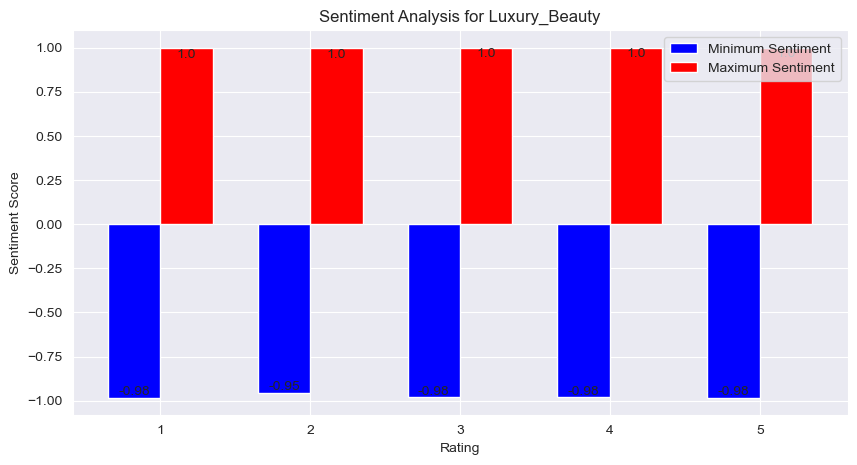

Category: AMAZON_FASHION, Rating: 1, Review Count: 7062
Category: AMAZON_FASHION, Rating: 2, Review Count: 5632
Category: AMAZON_FASHION, Rating: 3, Review Count: 9678
Category: AMAZON_FASHION, Rating: 4, Review Count: 18323
Category: AMAZON_FASHION, Rating: 5, Review Count: 59305


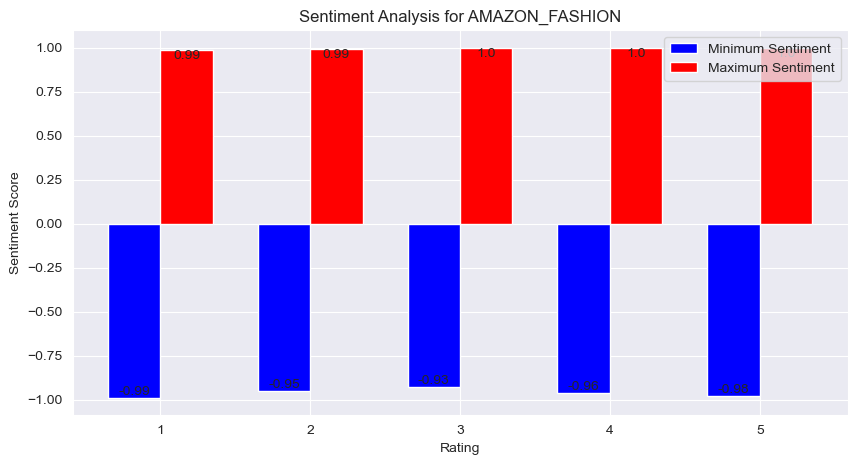

Category: Clothing_Shoes_and_Jewelry, Rating: 1, Review Count: 6026
Category: Clothing_Shoes_and_Jewelry, Rating: 2, Review Count: 4932
Category: Clothing_Shoes_and_Jewelry, Rating: 3, Review Count: 7785
Category: Clothing_Shoes_and_Jewelry, Rating: 4, Review Count: 16659
Category: Clothing_Shoes_and_Jewelry, Rating: 5, Review Count: 64598


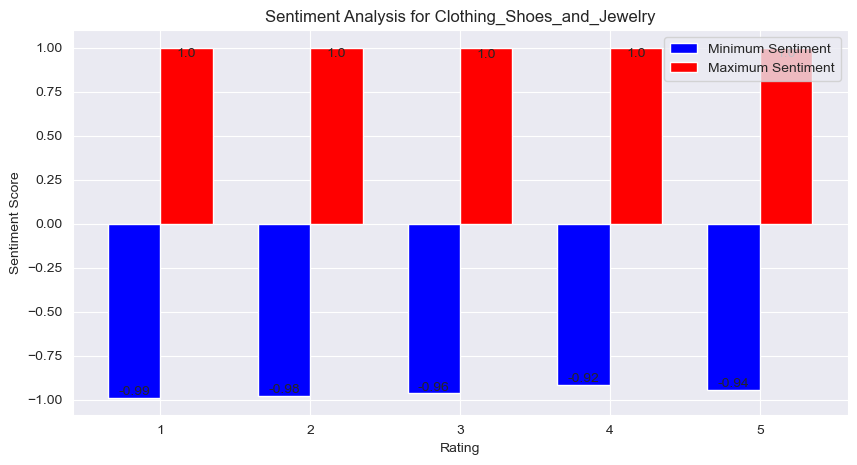

Category: All_Beauty, Rating: 1, Review Count: 7239
Category: All_Beauty, Rating: 2, Review Count: 4534
Category: All_Beauty, Rating: 3, Review Count: 6864
Category: All_Beauty, Rating: 4, Review Count: 15181
Category: All_Beauty, Rating: 5, Review Count: 66182


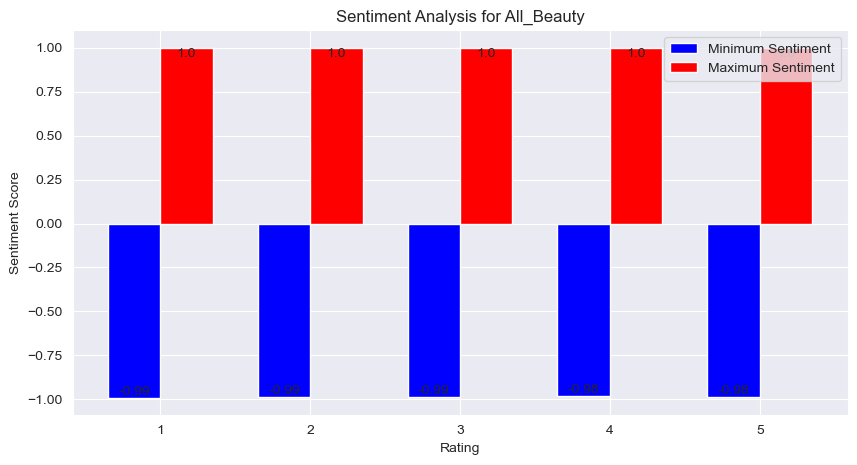

Category: Appliances, Rating: 1, Review Count: 8929
Category: Appliances, Rating: 2, Review Count: 3999
Category: Appliances, Rating: 3, Review Count: 6818
Category: Appliances, Rating: 4, Review Count: 15123
Category: Appliances, Rating: 5, Review Count: 65131


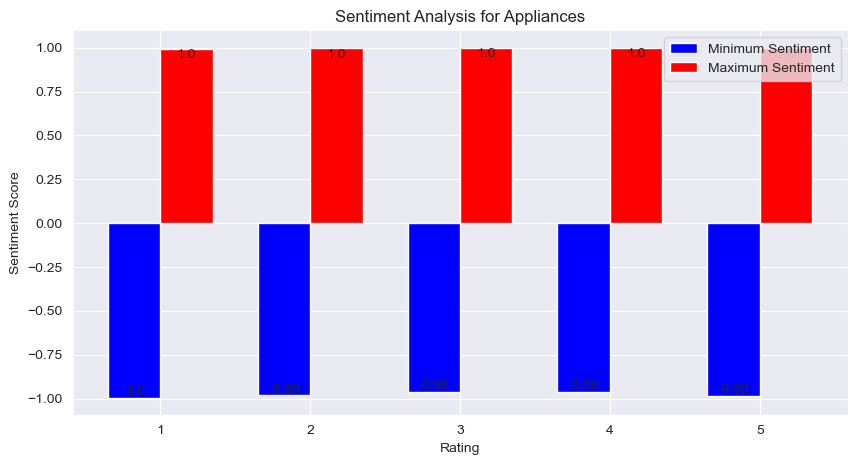

Category: Toys_and_Games, Rating: 1, Review Count: 5219
Category: Toys_and_Games, Rating: 2, Review Count: 3501
Category: Toys_and_Games, Rating: 3, Review Count: 6161
Category: Toys_and_Games, Rating: 4, Review Count: 13838
Category: Toys_and_Games, Rating: 5, Review Count: 71281


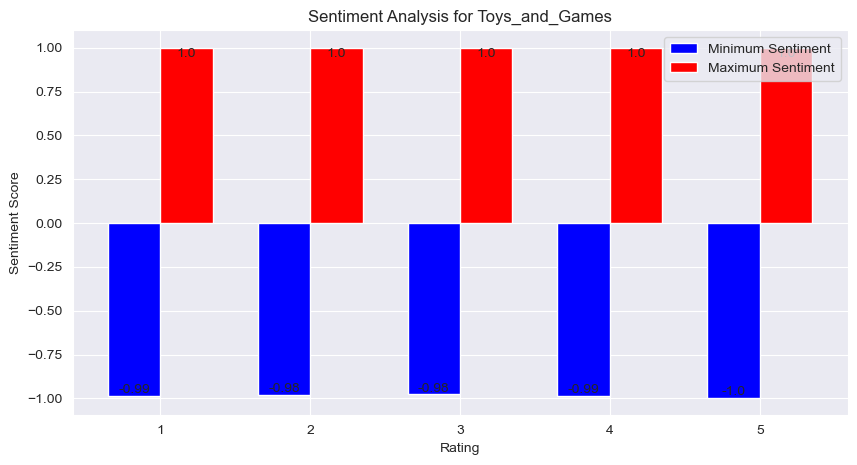

Category: Arts_Crafts_and_Sewing, Rating: 1, Review Count: 7333
Category: Arts_Crafts_and_Sewing, Rating: 2, Review Count: 4225
Category: Arts_Crafts_and_Sewing, Rating: 3, Review Count: 6707
Category: Arts_Crafts_and_Sewing, Rating: 4, Review Count: 13481
Category: Arts_Crafts_and_Sewing, Rating: 5, Review Count: 68254


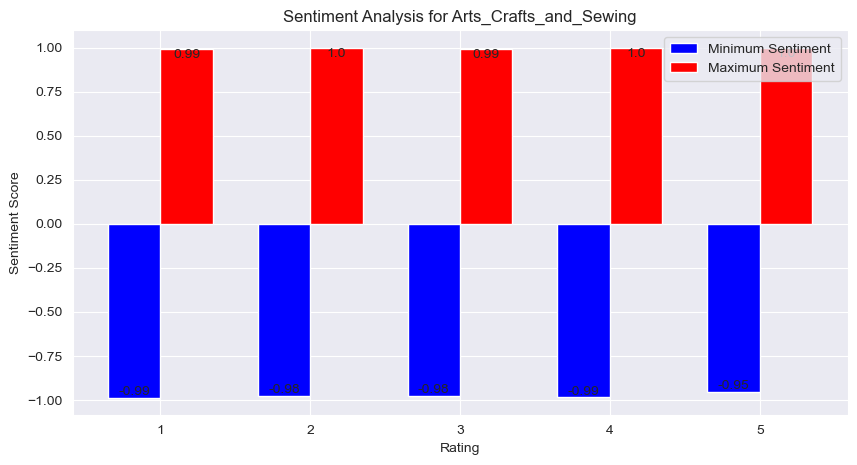

Category: Grocery_and_Gourmet_Food, Rating: 1, Review Count: 6203
Category: Grocery_and_Gourmet_Food, Rating: 2, Review Count: 3581
Category: Grocery_and_Gourmet_Food, Rating: 3, Review Count: 5525
Category: Grocery_and_Gourmet_Food, Rating: 4, Review Count: 10703
Category: Grocery_and_Gourmet_Food, Rating: 5, Review Count: 73988


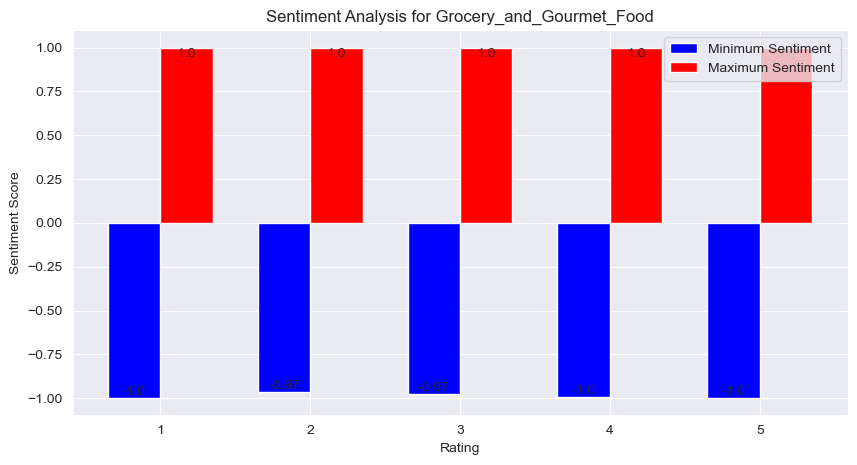

Category: Tools_and_Home_Improvement, Rating: 1, Review Count: 6047
Category: Tools_and_Home_Improvement, Rating: 2, Review Count: 3363
Category: Tools_and_Home_Improvement, Rating: 3, Review Count: 5851
Category: Tools_and_Home_Improvement, Rating: 4, Review Count: 14934
Category: Tools_and_Home_Improvement, Rating: 5, Review Count: 69805


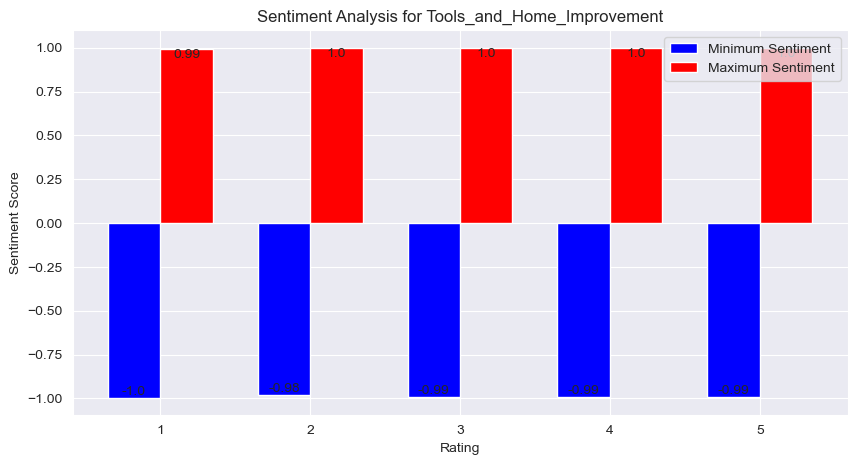

In [35]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import spacy
import random

# Set plot style
sns.set_style('darkgrid')
plt.rc('figure', figsize=(17, 13))

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Ensure text is a string
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Define your categories with file paths
categories = {
    'Luxury_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Luxury_Beauty.json',
    'AMAZON_FASHION': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json',
    'Clothing_Shoes_and_Jewelry': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json',
    'All_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json',
    'Appliances': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Appliances.json',
    'Toys_and_Games': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Toys_and_Games.json',
    'Arts_Crafts_and_Sewing': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Arts_Crafts_and_Sewing.json',
    'Grocery_and_Gourmet_Food': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Grocery_and_Gourmet_Food.json',
    'Tools_and_Home_Improvement': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Tools_and_Home_Improvement.json'
}

def process_reviews(categories, number_of_reviews):
    review_data = pd.DataFrame()
    for category, file_path in categories.items():
        print(f"Processing category: {category}")
        reader = pd.read_json(file_path, lines=True, chunksize=50000)
        count = 0
        for chunk in reader:
            for _, row in chunk.iterrows():
                if count < number_of_reviews:
                    review = pd.DataFrame({'category': [category],
                                           'rating': [int(row.get('overall', 0))],
                                           'review_text': [preprocess_text(row.get('reviewText', ''))]})
                    review_data = pd.concat([review_data, review], ignore_index=True)
                    count += 1
                else:
                    break
            if count >= number_of_reviews:
                break
    return review_data




# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Process and sample reviews
desired_reviews_per_category = 100000
review_data = process_reviews(categories, desired_reviews_per_category)

# Perform sentiment analysis
review_data['sentiment_score'] = review_data['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])


# Visualization function
def visualize_sentiment(review_data):
    # Create a summary DataFrame with the number of reviews for each rating
    review_counts = review_data.groupby(['category', 'rating']).size().reset_index(name='counts')
    
    # Merge the counts with the sentiment scores
    sentiment_by_category_and_rating = review_data.groupby(['category', 'rating'])['sentiment_score'].agg(['min', 'max']).reset_index()
    sentiment_and_counts = pd.merge(sentiment_by_category_and_rating, review_counts, on=['category', 'rating'])
    
    for category in categories.keys():
        category_data = sentiment_and_counts[sentiment_and_counts['category'] == category]
        fig, ax = plt.subplots(figsize=(10, 5))
        width = 0.35
        ratings = category_data['rating'].unique()
        min_scores = category_data['min']
        max_scores = category_data['max']
        review_counts = category_data['counts']
        ind = np.arange(len(ratings))
        min_bars = ax.bar(ind - width/2, min_scores, width, color='blue', label='Minimum Sentiment')
        max_bars = ax.bar(ind + width/2, max_scores, width, color='red', label='Maximum Sentiment')
        
        # Annotate bars with the sentiment score
        for bar in min_bars + max_bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), 
                    va='bottom' if yval < 0 else 'top', ha='center')
        
        # Print the review count per rating
        for rating, count in zip(ratings, review_counts):
            print(f"Category: {category}, Rating: {rating}, Review Count: {count}")
        
        ax.set_title(f'Sentiment Analysis for {category}')
        ax.set_xlabel('Rating')
        ax.set_ylabel('Sentiment Score')
        ax.set_xticks(ind)
        ax.set_xticklabels([str(rating) for rating in ratings])
        ax.legend()
        plt.show()

# Call the visualization function
visualize_sentiment(review_data)





In [37]:
# Calculate the average sentiment score for each category
average_sentiment_by_category = review_data.groupby('category')['sentiment_score'].mean().reset_index()

# Rename columns for clarity
average_sentiment_by_category.columns = ['Category', 'Average Sentiment Score']

# Display the average sentiment score for each category
print(average_sentiment_by_category)




                     Category  Average Sentiment Score
0              AMAZON_FASHION                 0.570192
1                  All_Beauty                 0.553124
2                  Appliances                 0.483536
3      Arts_Crafts_and_Sewing                 0.519625
4  Clothing_Shoes_and_Jewelry                 0.568287
5    Grocery_and_Gourmet_Food                 0.567589
6               Luxury_Beauty                 0.566259
7  Tools_and_Home_Improvement                 0.475964
8              Toys_and_Games                 0.655878


   Rating  Average Sentiment Score
0       1                 0.064922
1       2                 0.271336
2       3                 0.406347
3       4                 0.570172
4       5                 0.629055


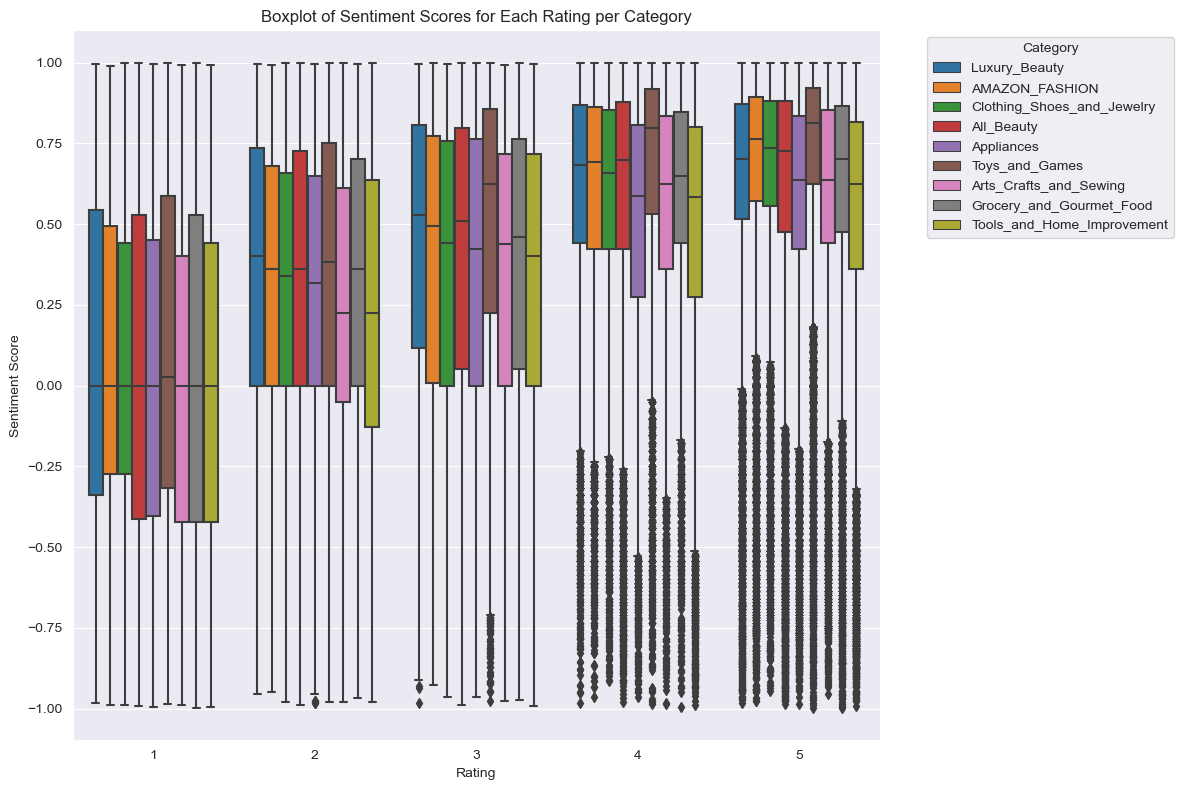

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure your review_data DataFrame is loaded and contains 'rating', 'sentiment_score', and 'category' columns

# Calculate the average sentiment score for each rating
average_sentiment_by_rating = review_data.groupby('rating')['sentiment_score'].mean().reset_index()
average_sentiment_by_rating.columns = ['Rating', 'Average Sentiment Score']

# Create boxplots for sentiment scores for each rating per category
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='sentiment_score', hue='category', data=review_data)
plt.title('Boxplot of Sentiment Scores for Each Rating per Category')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the average sentiment score per rating
print(average_sentiment_by_rating)

# Show the boxplot
plt.show()


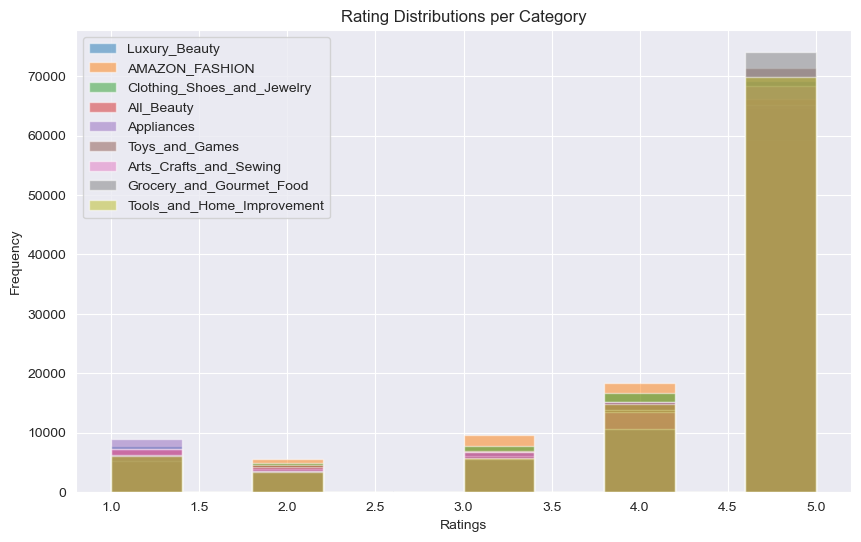

In [40]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings for Luxury_Beauty
luxury_beauty_ratings = review_data[review_data['category'] == 'Luxury_Beauty']['rating']
plt.figure(figsize=(10, 6))
luxury_beauty_ratings.hist(alpha=0.5, label='Luxury_Beauty')

# Plot the distribution of ratings for other categories
for category in review_data['category'].unique():
    if category != 'Luxury_Beauty':
        other_category_ratings = review_data[review_data['category'] == category]['rating']
        other_category_ratings.hist(alpha=0.5, label=category)

plt.title('Rating Distributions per Category')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [41]:
import pandas as pd

# Ensure your review_data DataFrame is loaded and contains 'category', 'rating', and 'sentiment_score' columns

# Calculate the average sentiment score for each category and rating
average_sentiment_by_category_and_rating = review_data.groupby(['category', 'rating'])['sentiment_score'].mean().reset_index()

# Rename columns for clarity
average_sentiment_by_category_and_rating.columns = ['Category', 'Rating', 'Average Sentiment Score']

# Display the average sentiment score per rating and by category
print(average_sentiment_by_category_and_rating)


                      Category  Rating  Average Sentiment Score
0               AMAZON_FASHION       1                 0.090041
1               AMAZON_FASHION       2                 0.295538
2               AMAZON_FASHION       3                 0.427179
3               AMAZON_FASHION       4                 0.597711
4               AMAZON_FASHION       5                 0.668286
5                   All_Beauty       1                 0.067697
6                   All_Beauty       2                 0.282176
7                   All_Beauty       3                 0.419774
8                   All_Beauty       4                 0.583674
9                   All_Beauty       5                 0.631606
10                  Appliances       1                 0.041897
11                  Appliances       2                 0.244207
12                  Appliances       3                 0.365458
13                  Appliances       4                 0.495629
14                  Appliances       5  

In [42]:
review_data.to_csv('review_data.csv', index=False)
